In [7]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [8]:
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

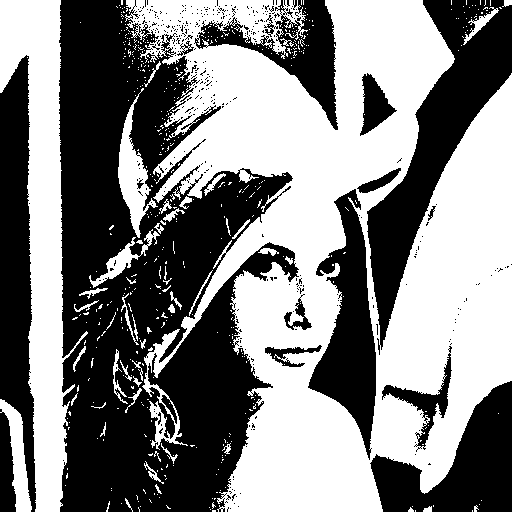

In [9]:
binarize_lena = lena_gray//128*255
cv2_imshow(binarize_lena)

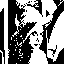

In [10]:
binarize64_lena = np.zeros((64,64))
for r in range(64):
  for c in range(64):
    binarize64_lena[r,c] = binarize_lena[r*8,c*8]
cv2_imshow(binarize64_lena)

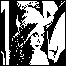

In [11]:
check_table = np.zeros((66,66))
check_table[1:-1,1:-1] = binarize64_lena
cv2_imshow(check_table)

In [12]:
def h(b,c,d,e):
  if b != c:
    return 's'
  else:
    if d==b and e==b:
      return 'r'
    else:
      return 'q'

In [18]:
def f(mtx):
  mtx_list = mtx.reshape(-1)
  qvalue = 0
  rvalue = 0
  for ads in [[4,5,2,1],[4,1,0,3],[4,3,6,7],[4,7,8,5]]:
    state = h(*mtx_list[ads])
    qvalue += 1 if state=='q' else 0
    rvalue += 1 if state=='r' else 0
  if rvalue==4:
    return 5
  else:
    return qvalue

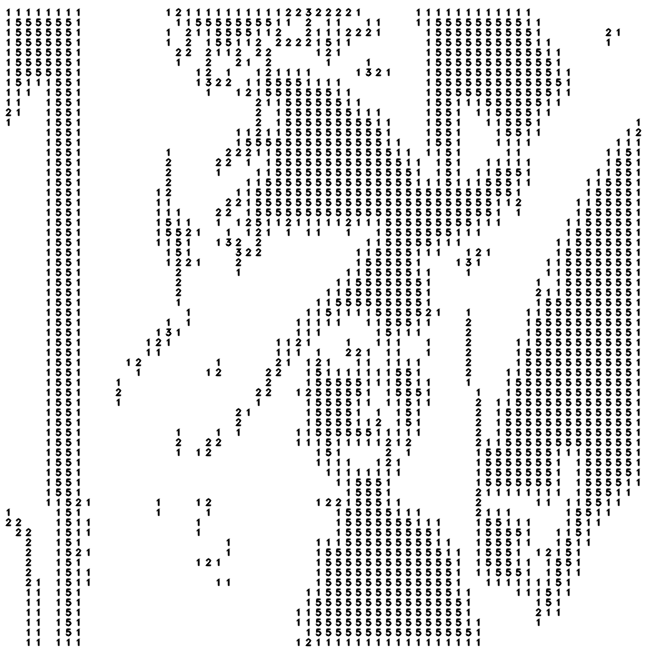

In [40]:
img = np.zeros((650, 650, 3), np.uint8)
img.fill(255)
result = np.zeros((64,64))
for r in range(64):
  for c in range(64):
    if check_table[r+1,c+1]>254:
      result[r,c] = f(check_table[r:r+3,c:c+3])
      if int(np.around(result[r,c]))>0:
        cv2.putText(img, str(int(np.around(result[r,c]))), (c*10+5,r*10+15), cv2.FONT_HERSHEY_DUPLEX, 0.3, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(img)

In [1]:
%%writefile /content/drive/MyDrive/CVHW/HW6.py
import cv2
import numpy as np

lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
binarize_lena = lena_gray//128*255

binarize64_lena = np.zeros((64,64))
for r in range(64):
  for c in range(64):
    binarize64_lena[r,c] = binarize_lena[r*8,c*8]
check_table = np.zeros((66,66))
check_table[1:-1,1:-1] = binarize64_lena

def h(b,c,d,e):
  if b != c:
    return 's'
  else:
    if d==b and e==b:
      return 'r'
    else:
      return 'q'

def f(mtx):
  mtx_list = mtx.reshape(-1)
  qvalue = 0
  rvalue = 0
  for ads in [[4,5,2,1],[4,1,0,3],[4,3,6,7],[4,7,8,5]]:
    state = h(*mtx_list[ads])
    qvalue += 1 if state=='q' else 0
    rvalue += 1 if state=='r' else 0
  if rvalue==4:
    return 5
  else:
    return qvalue


img = np.zeros((650, 650, 3), np.uint8)
img.fill(255)
result = np.zeros((64,64))
for r in range(64):
  for c in range(64):
    if check_table[r+1,c+1]>254:
      result[r,c] = f(check_table[r:r+3,c:c+3])
      if int(np.around(result[r,c]))>0:
        cv2.putText(img, str(int(np.around(result[r,c]))), (c*10+5,r*10+15), cv2.FONT_HERSHEY_DUPLEX, 0.3, (0, 0, 0), 1, cv2.LINE_AA)

cv2.imwrite('img.bmp', img)

Writing /content/drive/MyDrive/CVHW/HW6.py
